In [9]:
import os, json, urllib, requests, webbrowser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
import folium
from folium import plugins
import ipywidgets
import geocoder
from branca.element import Figure

In [47]:
popdf=pd.read_excel('Cities_population.xlsx')
popdf=popdf.sort_values(['POPULATION'], ascending=False).reset_index(drop=True)
popdf

,CITY,POPULATION
0,New York,8336817
1,Los Angeles,3979576
2,Houston,2320268
3,Chicago,2263976
4,Phoenix,1680992
5,Philadelphia,1584064
6,San Antonio,1547253
7,San Diego,1423851
8,Dallas,1343573
9,San Jose,1021795


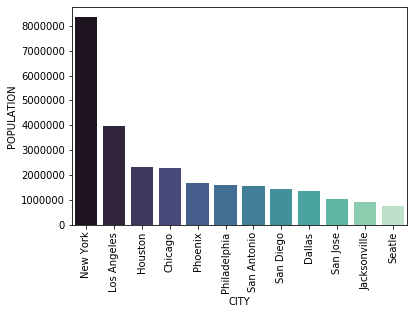

In [51]:
ax=sns.barplot(x='CITY', y='POPULATION', data=popdf, palette='mako')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [52]:

# Lista de top 10 ciudades de nueva york por población
    
city_dict={'new_york':(40.7152,-73.9958), 'los_angeles':(34.0118, -118.1361), \
           'phoenix':(33.4958,-112.0140), 'dallas':(32.7782, -96.8391), \
           'san_jose':(37.3348, -121.9208), 'san_antonio':(29.4278, -98.4569),\
           'seatle':(47.6100, -122.3094), 'philadelphia':(39.9520, -75.1647), \
           'san_diego':(32.7182, -117.1563), 'houston':(29.7455,-95.3230),\
          'jacksonville':(30.347,-81.3862), 'chicago':(41.93,-87.68)}

#locations es la lista con las coordenadas por ciudad
locations=[city_dict[element] for element in city_dict]

#base_url es la url genérica para la obtención de APIS.
base_url =r'https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint&parameters=FRQ_NROVRCST_70_18_GMT,FRQ_BRKNCLD_10_70_18_GMT,FRQ_CLRSKY_0_10_18_GMT,CLD_AMT,PRECTOT,TQV,QV2M,PS,T2M,WS50M,EQVLNT_NO_SUN_BLACKDAYS_MONTH,ALLSKY_SFC_SW_DWN,KT,DNR,MIDDAY_INSOL,SG_DAY_HOUR_AVG,SRF_ALB,ALLSKY_TOA_SW_DWN&userCommunity=SSE&tempAverage=CLIMATOLOGY&outputList=JSON&lat={latitude}&lon={longitude}'
    
#Se crean dos dataframes para el manejo de la información
#step_df es por cada ciudad, main_df es el dataframe compilador
#city_df es para agregar el nombre de la ciudad como dato
main_df=pd.DataFrame()
step_df=pd.DataFrame()
city_df=pd.DataFrame()

#Función city que convierte coordenadas en la llave ciudad. 
#donde 'y' son las coordenadas 
#utiliza la lista "city_dict" y el método items()

def city(y): 
    for key, value in city_dict.items(): 
         if y == value: 
             return key 
  
    return "key doesn't exist"


#Inicializa loop para crear Dataframe
for latitude, longitude in locations:
    api_request_url = base_url.format(longitude=longitude, latitude=latitude) #formato modificable para ingresar coordenadas de respectiva ciudad
    
# Python Memory Object
    json_response = json.loads(requests.get(api_request_url).content.decode('utf-8'))
    
#Converting into transition DataFrame
    city_df['CITY']=[city((latitude, longitude))for i in range(13)] #makes a series with the name of the city for given lat and long
    step_df=pd.DataFrame(json_response['features'][0]['properties']['parameter'])
    step_df.insert(0,"CITY",[city((latitude, longitude))for i in range(13)]) #inserta al inicio lista con el nombre de la ciudad correspondiente, utiliza la funcón 'city'
    
    
#Appending to main DataFrame
    main_df=main_df.append(step_df)
    
main_df
    
    

,CITY,ALLSKY_SFC_SW_DWN,ALLSKY_TOA_SW_DWN,CLD_AMT,DNR,EQVLNT_NO_SUN_BLACKDAYS_MONTH,FRQ_BRKNCLD_10_70_18_GMT,FRQ_CLRSKY_0_10_18_GMT,FRQ_NROVRCST_70_18_GMT,KT,MIDDAY_INSOL,PRECTOT,PS,QV2M,SG_DAY_HOUR_AVG,SRF_ALB,T2M,TQV,WS50M
1,new_york,1.97,4.19,66.6,3.43,4.72,25.07,9.97,64.96,0.48,299.00,2.79,101.27,3.25,9.62,0.10,-0.64,0.95,7.05
10,new_york,3.26,6.31,51.9,4.54,4.18,14.52,31.09,54.40,0.51,405.09,3.23,101.27,7.45,11.17,0.06,13.21,1.87,6.04
11,new_york,2.14,4.57,61.4,3.47,5.88,19.09,20.00,60.91,0.47,289.35,3.10,101.36,5.43,9.97,0.06,7.49,1.44,6.67
12,new_york,1.73,3.75,62.8,3.18,6.98,23.90,16.57,59.53,0.46,260.42,3.16,101.30,3.89,9.33,0.07,2.25,1.09,6.95
13,new_york,3.98,7.85,60.9,4.55,-999.00,-999.00,-999.00,-999.00,0.51,-999.00,3.25,101.16,7.48,-999.00,0.07,11.19,1.98,6.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,chicago,5.29,11.02,66.0,4.68,5.39,7.77,19.79,72.43,0.49,569.06,3.40,99.08,7.96,14.55,0.12,13.80,2.15,6.92
6,chicago,5.91,11.61,60.9,5.38,2.53,13.33,20.91,65.76,0.51,626.93,3.31,99.06,11.00,15.18,0.12,19.38,2.85,5.95
7,chicago,5.99,11.27,52.7,5.76,6.88,23.75,21.41,54.84,0.54,636.57,3.18,99.16,12.93,14.88,0.13,22.65,3.24,5.44
8,chicago,5.15,10.06,51.4,5.08,3.43,22.43,20.82,56.74,0.52,578.70,3.40,99.26,12.35,13.85,0.12,22.11,3.07,5.31


In [53]:
#Comienza DF Manipulation


#Crea una lista con los nombres cortos de los parámetros (llaves diccionario)
shortname_list=list(json_response['parameterInformation'].keys())

#Crea lista auxiliar 
head_list=['longname', 'units']

#Crea lista con nombre largo + unidad de parámetro (valores de diccionario)
head_list=['longname', 'units']
values_list=[json_response['parameterInformation'][i][j] for i in shortname_list for j in head_list] #crea una lista con los nombres largos + unidades de manera intercalada
joined_v_list=[ ' '.join(x) for x in zip(values_list[0::2], values_list[1::2])] #concatena nombre largo +

#Crea diccionario de encabezados
head_dict = dict(zip(shortname_list, joined_v_list))
head_dict['index']='MONTH'

#Ordena tabla, Resetea el Index y Renombra Columnas
#main_df.sort_values(['CITY', 'MONTH'], ascending=[True, True], inplace=True)
main_df.reset_index(inplace=True)
main_df=main_df.rename(columns=head_dict) #cambia los nombres del encabezado de acuerdo al diccionario
main_df.MONTH=main_df['MONTH'].astype('int32')

main_df

,MONTH,CITY,All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day,Top-of-atmosphere Insolation kW-hr/m^2/day,Daylight Cloud Amount %,Direct Normal Radiation kW-hr/m^2/day,Equivalent Number Of NO-SUN Or BLACK Days Over A Consecutive Month Period days,Frequency Of Broken-cloud Skies 10 - 70 % At 18 GMT %,Frequency Of Clear Skies < 10% At 18 GMT %,Frequency Of Near-overcast Skies >= 70% At 18 GMT %,Insolation Clearness Index dimensionless,Midday Insolation Incident On A Horizontal Surface W m-2,Precipitation mm day-1,Surface Pressure kPa,Specific Humidity at 2 Meters g/kg,Daylight Hours hours,Surface Albedo dimensionless,Temperature at 2 Meters C,Total Column Precipitable Water cm,Wind Speed at 50 Meters m/s
0,1,new_york,1.97,4.19,66.6,3.43,4.72,25.07,9.97,64.96,0.48,299.00,2.79,101.27,3.25,9.62,0.10,-0.64,0.95,7.05
1,10,new_york,3.26,6.31,51.9,4.54,4.18,14.52,31.09,54.40,0.51,405.09,3.23,101.27,7.45,11.17,0.06,13.21,1.87,6.04
2,11,new_york,2.14,4.57,61.4,3.47,5.88,19.09,20.00,60.91,0.47,289.35,3.10,101.36,5.43,9.97,0.06,7.49,1.44,6.67
3,12,new_york,1.73,3.75,62.8,3.18,6.98,23.90,16.57,59.53,0.46,260.42,3.16,101.30,3.89,9.33,0.07,2.25,1.09,6.95
4,13,new_york,3.98,7.85,60.9,4.55,-999.00,-999.00,-999.00,-999.00,0.51,-999.00,3.25,101.16,7.48,-999.00,0.07,11.19,1.98,6.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,5,chicago,5.29,11.02,66.0,4.68,5.39,7.77,19.79,72.43,0.49,569.06,3.40,99.08,7.96,14.55,0.12,13.80,2.15,6.92
152,6,chicago,5.91,11.61,60.9,5.38,2.53,13.33,20.91,65.76,0.51,626.93,3.31,99.06,11.00,15.18,0.12,19.38,2.85,5.95
153,7,chicago,5.99,11.27,52.7,5.76,6.88,23.75,21.41,54.84,0.54,636.57,3.18,99.16,12.93,14.88,0.13,22.65,3.24,5.44
154,8,chicago,5.15,10.06,51.4,5.08,3.43,22.43,20.82,56.74,0.52,578.70,3.40,99.26,12.35,13.85,0.12,22.11,3.07,5.31


In [54]:
main_df.head(50) 

,MONTH,CITY,All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day,Top-of-atmosphere Insolation kW-hr/m^2/day,Daylight Cloud Amount %,Direct Normal Radiation kW-hr/m^2/day,Equivalent Number Of NO-SUN Or BLACK Days Over A Consecutive Month Period days,Frequency Of Broken-cloud Skies 10 - 70 % At 18 GMT %,Frequency Of Clear Skies < 10% At 18 GMT %,Frequency Of Near-overcast Skies >= 70% At 18 GMT %,Insolation Clearness Index dimensionless,Midday Insolation Incident On A Horizontal Surface W m-2,Precipitation mm day-1,Surface Pressure kPa,Specific Humidity at 2 Meters g/kg,Daylight Hours hours,Surface Albedo dimensionless,Temperature at 2 Meters C,Total Column Precipitable Water cm,Wind Speed at 50 Meters m/s
0,1,new_york,1.97,4.19,66.6,3.43,4.72,25.07,9.97,64.96,0.48,299.00,2.79,101.27,3.25,9.62,0.10,-0.64,0.95,7.05
1,10,new_york,3.26,6.31,51.9,4.54,4.18,14.52,31.09,54.40,0.51,405.09,3.23,101.27,7.45,11.17,0.06,13.21,1.87,6.04
2,11,new_york,2.14,4.57,61.4,3.47,5.88,19.09,20.00,60.91,0.47,289.35,3.10,101.36,5.43,9.97,0.06,7.49,1.44,6.67
3,12,new_york,1.73,3.75,62.8,3.18,6.98,23.90,16.57,59.53,0.46,260.42,3.16,101.30,3.89,9.33,0.07,2.25,1.09,6.95
4,13,new_york,3.98,7.85,60.9,4.55,-999.00,-999.00,-999.00,-999.00,0.51,-999.00,3.25,101.16,7.48,-999.00,0.07,11.19,1.98,6.07
5,2,new_york,2.86,5.68,65.4,4.21,5.77,24.76,8.68,66.56,0.51,395.45,2.56,101.23,3.27,10.70,0.09,0.00,0.94,7.13
6,3,new_york,3.93,7.70,66.1,4.71,4.02,16.57,12.90,70.53,0.52,491.90,3.34,101.19,4.15,11.93,0.07,3.48,1.18,6.93
7,4,new_york,4.83,9.67,64.1,4.80,5.21,11.52,22.88,65.61,0.51,540.12,3.23,101.00,5.77,13.28,0.06,8.80,1.58,6.30
8,5,new_york,5.55,11.04,62.2,5.09,8.37,12.90,21.99,65.10,0.51,588.35,3.41,101.05,8.33,14.43,0.06,14.33,2.24,5.61
9,6,new_york,6.03,11.60,60.1,5.55,7.36,17.88,19.55,62.58,0.53,617.28,3.54,100.93,11.46,15.03,0.07,19.84,3.01,5.23


In [26]:
mapa= folium.Map([41, -100], zoom_start=4)
mapa

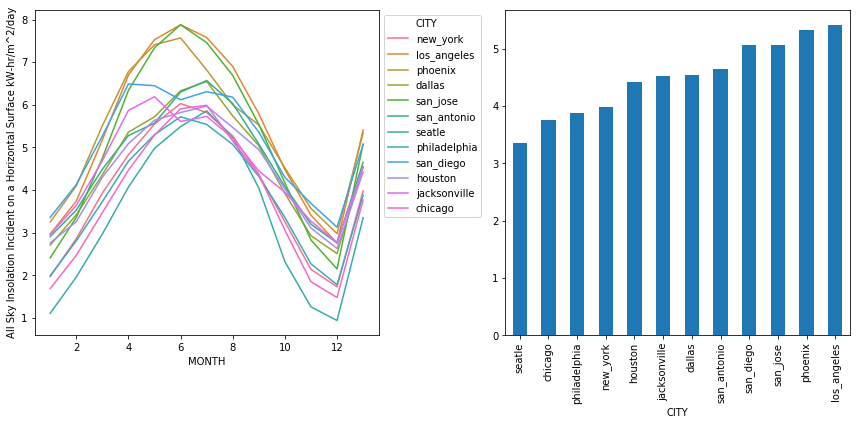

In [77]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,6))

plt.sca(axes[0])
ax = sns.lineplot(data = main_df, x = main_df['MONTH'].sort_values(),
                      y = main_df['All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day'],
                      hue = main_df['CITY'])
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

plt.sca(axes[1])
main_df.groupby('CITY')['All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day'].mean().sort_values().plot.bar()

plt.tight_layout()

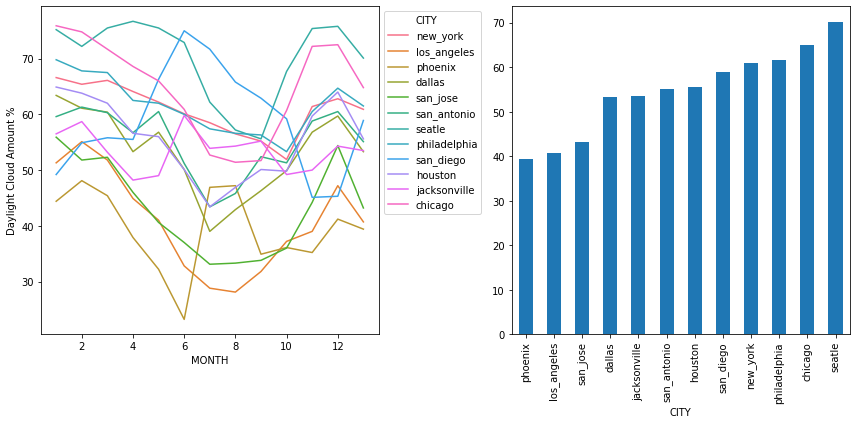

In [78]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,6))

plt.sca(axes[0])
ax = sns.lineplot(data = main_df, x = main_df['MONTH'].sort_values(),
                      y = main_df['Daylight Cloud Amount %'],
                      hue = main_df['CITY'])
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

plt.sca(axes[1])
main_df.groupby('CITY')['Daylight Cloud Amount %'].mean().sort_values().plot.bar()

plt.tight_layout()

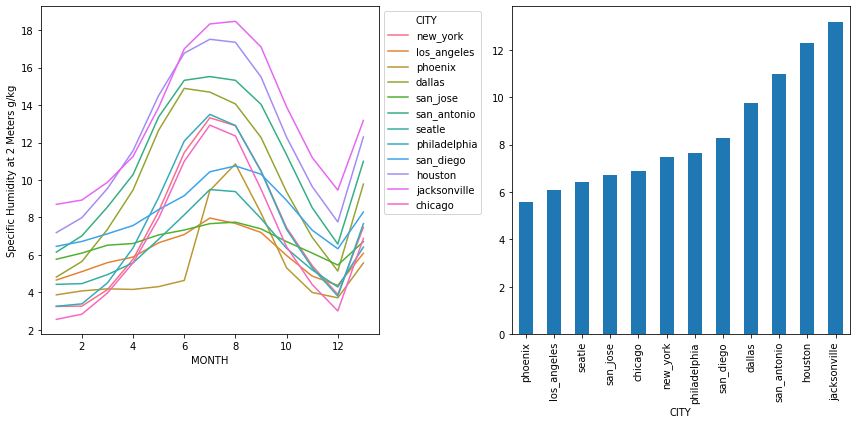

In [79]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,6))

plt.sca(axes[0])
ax = sns.lineplot(data = main_df, x = main_df['MONTH'].sort_values(),
                      y = main_df['Specific Humidity at 2 Meters g/kg'],
                      hue = main_df['CITY'])
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

plt.sca(axes[1])
main_df.groupby('CITY')['Specific Humidity at 2 Meters g/kg'].mean().sort_values().plot.bar()

plt.tight_layout()  

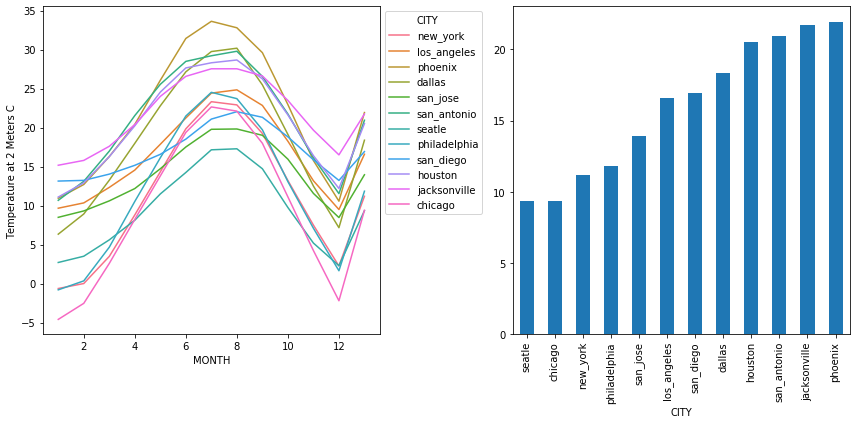

In [80]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,6))

plt.sca(axes[0])
ax = sns.lineplot(data = main_df, x = main_df['MONTH'].sort_values(),
                      y = main_df['Temperature at 2 Meters C'],
                      hue = main_df['CITY'])
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

plt.sca(axes[1])
main_df.groupby('CITY')['Temperature at 2 Meters C'].mean().sort_values().plot.bar()

plt.tight_layout() 

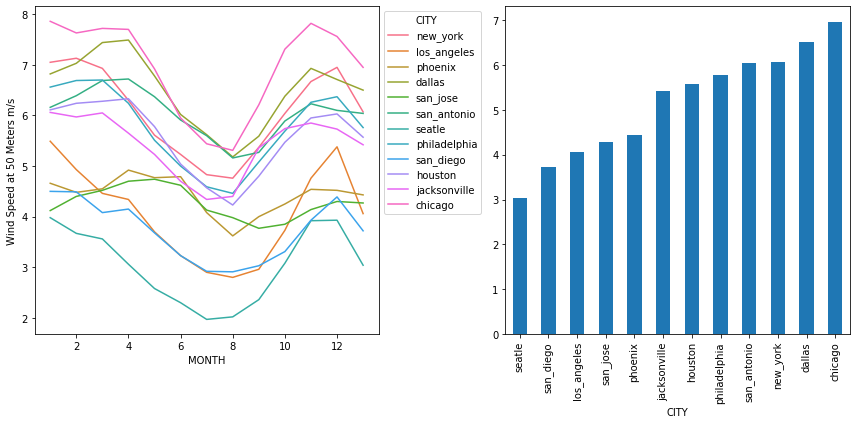

In [81]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,6))

plt.sca(axes[0])
ax = sns.lineplot(data = main_df, x = main_df['MONTH'].sort_values(),
                      y = main_df['Wind Speed at 50 Meters m/s'],
                      hue = main_df['CITY'])
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

plt.sca(axes[1])
main_df.groupby('CITY')['Wind Speed at 50 Meters m/s'].mean().sort_values().plot.bar()

plt.tight_layout()


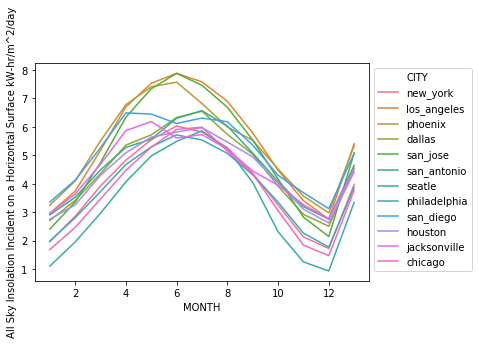

In [73]:
ax = sns.lineplot(data = main_df, x = main_df['MONTH'].sort_values(),
                      y = main_df['All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day'],
                      hue = main_df['CITY'])
plt.legend(bbox_to_anchor=(1, 1), loc=2) 



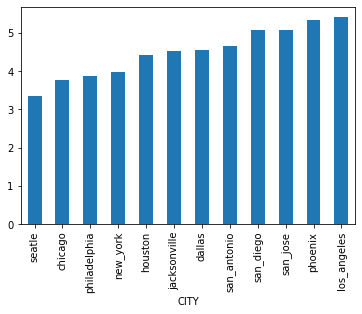

In [74]:
main_df.groupby('CITY')['All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day'].mean().sort_values().plot.bar()

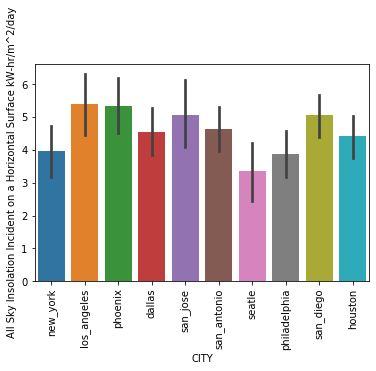

In [15]:
ax=sns.barplot(x='CITY', y='All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day', data=main_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);


In [16]:
mon_vs_askyins=main_df.pivot_table(index=['CITY'], columns=['MONTH'], values=['All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day'])#['All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day']

In [37]:
mon_vs_askyins2=main_df.pivot_table(index=['MONTH'], columns=['CITY'], values=['All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day'])#['All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day']
mon_vs_askyins2

All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day  \
CITY                                                             dallas   
MONTH                                                                     
1                                                   2.71                  
2                                                   3.42                  
3                                                   4.36                  
4                                                   5.36                  
5                                                   5.72                  
6                                                   6.33                  
7                                                   6.55                  
8                                                   5.74                  
9                                                   5.04                  
10                                                  3.92                  
11                                                  2.93                  
12                                                  2.51                  
13                                                  4.55                  

                                                                               \
CITY  houston los_angeles new_york philadelphia phoenix san_antonio san_diego   
MONTH                                                                           
1        2.76        2.97     1.97         1.99    3.25        2.91      3.36   
2        3.26        3.74     2.86         2.81    4.10        3.53      4.13   
3        4.30        5.18     3.93         3.73    5.51        4.49      5.27   
4        5.09        6.70     4.83         4.68    6.78        5.28      6.49   
5        5.64        7.53     5.55         5.30    7.41        5.57      6.45   
6        5.82        7.88     6.03         5.72    7.57        6.30      6.12   
7        5.97        7.58     5.82         5.54    6.82        6.57      6.31   
8        5.47        6.90     5.27         5.07    6.00        6.03      6.18   
9        4.95        5.79     4.37         4.32    5.53        5.08      5.36   
10       4.03        4.48     3.26         3.36    4.52        4.08      4.30   
11       3.11        3.41     2.14         2.27    3.57        3.20      3.69   
12       2.63        2.76     1.73         1.78    2.98        2.76      3.13   
13       4.42        5.41     3.98         3.88    5.34        4.65      5.07   

                       
CITY  san_jose seatle  
MONTH                  
1         2.41   1.11  
2         3.36   1.96  
3         4.75   2.97  
4         6.34   4.07  
5         7.34   4.98  
6         7.88   5.49  
7         7.46   5.86  
8         6.69   5.23  
9         5.54   4.05  
10        4.17   2.32  
11        2.83   1.26  
12        2.15   0.94  
13        5.08   3.35

In [44]:
mon_vs_askyins

All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day  \
MONTH                                                                       1    
CITY                                                                             
dallas                                                     2.71                  
houston                                                    2.76                  
los_angeles                                                2.97                  
new_york                                                   1.97                  
philadelphia                                               1.99                  
phoenix                                                    3.25                  
san_antonio                                                2.91                  
san_diego                                                  3.36                  
san_jose                                                   2.41                  
seatle                                                     1.11                  

                                                                          \
MONTH           2     3     4     5     6     7     8     9     10    11   
CITY                                                                       
dallas        3.42  4.36  5.36  5.72  6.33  6.55  5.74  5.04  3.92  2.93   
houston       3.26  4.30  5.09  5.64  5.82  5.97  5.47  4.95  4.03  3.11   
los_angeles   3.74  5.18  6.70  7.53  7.88  7.58  6.90  5.79  4.48  3.41   
new_york      2.86  3.93  4.83  5.55  6.03  5.82  5.27  4.37  3.26  2.14   
philadelphia  2.81  3.73  4.68  5.30  5.72  5.54  5.07  4.32  3.36  2.27   
phoenix       4.10  5.51  6.78  7.41  7.57  6.82  6.00  5.53  4.52  3.57   
san_antonio   3.53  4.49  5.28  5.57  6.30  6.57  6.03  5.08  4.08  3.20   
san_diego     4.13  5.27  6.49  6.45  6.12  6.31  6.18  5.36  4.30  3.69   
san_jose      3.36  4.75  6.34  7.34  7.88  7.46  6.69  5.54  4.17  2.83   
seatle        1.96  2.97  4.07  4.98  5.49  5.86  5.23  4.05  2.32  1.26   

                          
MONTH           12    13  
CITY                      
dallas        2.51  4.55  
houston       2.63  4.42  
los_angeles   2.76  5.41  
new_york      1.73  3.98  
philadelphia  1.78  3.88  
phoenix       2.98  5.34  
san_antonio   2.76  4.65  
san_diego     3.13  5.07  
san_jose      2.15  5.08  
seatle        0.94  3.35

ConversionError: Failed to convert value(s) to axis units: Index(['dallas', 'houston', 'los_angeles', 'new_york', 'philadelphia',
       'phoenix', 'san_antonio', 'san_diego', 'san_jose', 'seatle'],
      dtype='object', name='CITY')

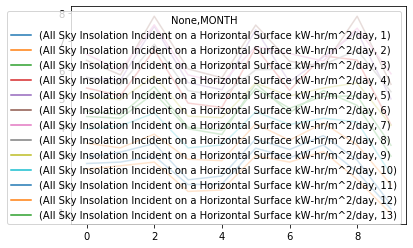

In [45]:
#  EJEMPLO DE FRACASO EN GRAFICA ======> ax = mon_vs_askyins.plot(xticks=mon_vs_askyins.index)
#ylab = ax.set_ylabel('Murder Rate')


In [7]:
main_df.corr()

,MONTH,All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day,Top-of-atmosphere Insolation kW-hr/m^2/day,Daylight Cloud Amount %,Direct Normal Radiation kW-hr/m^2/day,Equivalent Number Of NO-SUN Or BLACK Days Over A Consecutive Month Period days,Frequency Of Broken-cloud Skies 10 - 70 % At 18 GMT %,Frequency Of Clear Skies < 10% At 18 GMT %,Frequency Of Near-overcast Skies >= 70% At 18 GMT %,Insolation Clearness Index dimensionless,Midday Insolation Incident On A Horizontal Surface W m-2,Precipitation mm day-1,Surface Pressure kPa,Specific Humidity at 2 Meters g/kg,Daylight Hours hours,Surface Albedo dimensionless,Temperature at 2 Meters C,Total Column Precipitable Water cm,Wind Speed at 50 Meters m/s
MONTH,1.000000,-0.093115,-0.132612,-0.193529,-0.014642,-0.463113,-0.460365,-0.456664,-0.470279,0.036141,-0.465577,-0.030439,0.000612,0.144008,-0.463591,-0.071375,0.188487,0.167293,-0.139269
All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day,-0.093115,1.000000,0.935583,-0.527361,0.824170,-0.002300,-0.002736,0.020842,-0.018050,0.679071,0.331046,-0.551093,-0.327896,0.470330,0.005252,0.266944,0.753326,0.409642,-0.316506
Top-of-atmosphere Insolation kW-hr/m^2/day,-0.132612,0.935583,1.000000,-0.278838,0.585712,-0.001459,-0.002781,0.009407,-0.006362,0.407684,0.305469,-0.323693,-0.088266,0.633039,0.005947,0.151840,0.752229,0.582225,-0.213758
Daylight Cloud Amount %,-0.193529,-0.527361,-0.278838,1.000000,-0.797572,0.003310,-0.004658,-0.039940,0.044657,-0.844833,-0.186742,0.612022,0.542857,-0.087904,-0.000748,-0.590732,-0.552075,-0.092541,0.171793
Direct Normal Radiation kW-hr/m^2/day,-0.014642,0.824170,0.585712,-0.797572,1.000000,-0.003239,-0.001562,0.033799,-0.033273,0.963844,0.280969,-0.805833,-0.596100,0.072673,0.002540,0.343136,0.539284,0.003666,-0.366534
Equivalent Number Of NO-SUN Or BLACK Days Over A Consecutive Month Period days,-0.463113,-0.002300,-0.001459,0.003310,-0.003239,1.000000,0.999592,0.998772,0.998992,-0.002537,0.940114,0.001283,0.002659,-0.000594,0.999952,0.009057,-0.002273,-0.000935,0.001855
Frequency Of Broken-cloud Skies 10 - 70 % At 18 GMT %,-0.460365,-0.002736,-0.002781,-0.004658,-0.001562,0.999592,1.000000,0.998291,0.998157,0.000549,0.939606,0.004709,-0.003947,0.004352,0.999641,0.011755,0.001629,0.004588,-0.005372
Frequency Of Clear Skies < 10% At 18 GMT %,-0.456664,0.020842,0.009407,-0.039940,0.033799,0.998772,0.998291,1.000000,0.995833,0.036137,0.947560,-0.030815,-0.022459,-0.006741,0.998896,0.039912,0.017924,-0.005592,-0.001864
Frequency Of Near-overcast Skies >= 70% At 18 GMT %,-0.470279,-0.018050,-0.006362,0.044657,-0.033273,0.998992,0.998157,0.995833,1.000000,-0.035709,0.933131,0.025006,0.025842,0.002223,0.998834,-0.018104,-0.019040,0.000592,0.006958
Insolation Clearness Index dimensionless,0.036141,0.679071,0.407684,-0.844833,0.963844,-0.002537,0.000549,0.036137,-0.035709,1.000000,0.241592,-0.847836,-0.638761,-0.014187,0.001988,0.358374,0.479036,-0.081578,-0.335363


In [19]:
main_df.groupby(['CITY']).mean()

,MONTH,All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day,Top-of-atmosphere Insolation kW-hr/m^2/day,Daylight Cloud Amount %,Direct Normal Radiation kW-hr/m^2/day,Equivalent Number Of NO-SUN Or BLACK Days Over A Consecutive Month Period days,Frequency Of Broken-cloud Skies 10 - 70 % At 18 GMT %,Frequency Of Clear Skies < 10% At 18 GMT %,Frequency Of Near-overcast Skies >= 70% At 18 GMT %,Insolation Clearness Index dimensionless,Midday Insolation Incident On A Horizontal Surface W m-2,Precipitation mm day-1,Surface Pressure kPa,Specific Humidity at 2 Meters g/kg,Daylight Hours hours,Surface Albedo dimensionless,Temperature at 2 Meters C,Total Column Precipitable Water cm,Wind Speed at 50 Meters m/s
CITY,,,,,,,,,,,,,,,,,,,
dallas,7,4.549231,8.593846,53.307692,4.873846,-71.702308,-60.420000,-51.045385,-26.765385,0.531538,441.018462,2.651538,99.598462,9.776923,-65.600769,0.134615,18.383846,2.560000,6.499231
houston,7,4.419231,8.837692,55.607692,4.346154,-71.620769,-57.393846,-57.396154,-23.440000,0.503077,426.921538,3.526923,101.365385,12.302308,-65.613846,0.134615,20.511538,3.040769,5.569231
los_angeles,7,5.410000,8.423077,40.746154,7.053077,-73.356923,-52.991538,-44.458462,-40.778462,0.631538,501.858462,0.946154,94.996923,6.088462,-65.596923,0.131538,16.582308,1.312308,4.056923
new_york,7,3.980000,7.854615,60.900000,4.547692,-71.938462,-59.373846,-59.566154,-19.290000,0.507692,352.729231,3.254615,101.160769,7.476154,-65.575385,0.070769,11.186923,1.976154,6.072308
philadelphia,7,3.880769,7.956154,61.530769,4.241538,-71.776154,-57.682308,-60.255385,-20.293846,0.490769,349.020769,3.152308,101.130769,7.670000,-65.577692,0.120769,11.840000,2.060000,5.762308
phoenix,7,5.336923,8.510000,39.392308,6.826154,-73.920769,-59.117692,-33.416154,-45.696154,0.632308,490.727692,0.647692,96.298462,5.566923,-65.602308,0.190769,21.930000,1.652308,4.431538
san_antonio,7,4.650000,8.837692,55.146154,4.797692,-70.899231,-62.726154,-52.233846,-23.270000,0.529231,451.403846,2.102308,99.502308,11.002308,-65.614615,0.131538,20.941538,2.836923,6.040769
san_diego,7,5.066154,8.593846,58.892308,6.143846,-71.810769,-62.792308,-57.766923,-17.673846,0.596923,496.662308,0.796154,98.918462,8.293077,-65.605385,0.058462,16.916923,1.602308,3.718462
san_jose,7,5.076923,8.147692,43.200000,6.620000,-71.882308,-58.259231,-39.970000,-40.001538,0.609231,477.374615,1.406154,98.838462,6.706923,-65.589231,0.133077,13.949231,1.424615,4.272308


In [8]:
#Matriz de correlaciones 
main_df[main_df.columns[2:]].corr()

pd.plotting.scatter_matrix(data.iloc[: , 0:10]);


,All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day,Top-of-atmosphere Insolation kW-hr/m^2/day,Daylight Cloud Amount %,Direct Normal Radiation kW-hr/m^2/day,Equivalent Number Of NO-SUN Or BLACK Days Over A Consecutive Month Period days,Frequency Of Broken-cloud Skies 10 - 70 % At 18 GMT %,Frequency Of Clear Skies < 10% At 18 GMT %,Frequency Of Near-overcast Skies >= 70% At 18 GMT %,Insolation Clearness Index dimensionless,Midday Insolation Incident On A Horizontal Surface W m-2,Precipitation mm day-1,Surface Pressure kPa,Specific Humidity at 2 Meters g/kg,Daylight Hours hours,Surface Albedo dimensionless,Temperature at 2 Meters C,Total Column Precipitable Water cm,Wind Speed at 50 Meters m/s
All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day,1.000000,0.935583,-0.527361,0.824170,-0.002300,-0.002736,0.020842,-0.018050,0.679071,0.331046,-0.551093,-0.327896,0.470330,0.005252,0.266944,0.753326,0.409642,-0.316506
Top-of-atmosphere Insolation kW-hr/m^2/day,0.935583,1.000000,-0.278838,0.585712,-0.001459,-0.002781,0.009407,-0.006362,0.407684,0.305469,-0.323693,-0.088266,0.633039,0.005947,0.151840,0.752229,0.582225,-0.213758
Daylight Cloud Amount %,-0.527361,-0.278838,1.000000,-0.797572,0.003310,-0.004658,-0.039940,0.044657,-0.844833,-0.186742,0.612022,0.542857,-0.087904,-0.000748,-0.590732,-0.552075,-0.092541,0.171793
Direct Normal Radiation kW-hr/m^2/day,0.824170,0.585712,-0.797572,1.000000,-0.003239,-0.001562,0.033799,-0.033273,0.963844,0.280969,-0.805833,-0.596100,0.072673,0.002540,0.343136,0.539284,0.003666,-0.366534
Equivalent Number Of NO-SUN Or BLACK Days Over A Consecutive Month Period days,-0.002300,-0.001459,0.003310,-0.003239,1.000000,0.999592,0.998772,0.998992,-0.002537,0.940114,0.001283,0.002659,-0.000594,0.999952,0.009057,-0.002273,-0.000935,0.001855
Frequency Of Broken-cloud Skies 10 - 70 % At 18 GMT %,-0.002736,-0.002781,-0.004658,-0.001562,0.999592,1.000000,0.998291,0.998157,0.000549,0.939606,0.004709,-0.003947,0.004352,0.999641,0.011755,0.001629,0.004588,-0.005372
Frequency Of Clear Skies < 10% At 18 GMT %,0.020842,0.009407,-0.039940,0.033799,0.998772,0.998291,1.000000,0.995833,0.036137,0.947560,-0.030815,-0.022459,-0.006741,0.998896,0.039912,0.017924,-0.005592,-0.001864
Frequency Of Near-overcast Skies >= 70% At 18 GMT %,-0.018050,-0.006362,0.044657,-0.033273,0.998992,0.998157,0.995833,1.000000,-0.035709,0.933131,0.025006,0.025842,0.002223,0.998834,-0.018104,-0.019040,0.000592,0.006958
Insolation Clearness Index dimensionless,0.679071,0.407684,-0.844833,0.963844,-0.002537,0.000549,0.036137,-0.035709,1.000000,0.241592,-0.847836,-0.638761,-0.014187,0.001988,0.358374,0.479036,-0.081578,-0.335363
Midday Insolation Incident On A Horizontal Surface W m-2,0.331046,0.305469,-0.186742,0.280969,0.940114,0.939606,0.947560,0.933131,0.241592,1.000000,-0.198079,-0.107375,0.166291,0.942531,0.102021,0.258951,0.141491,-0.093519


Text(0.5, 1, 'Correlation matrix')

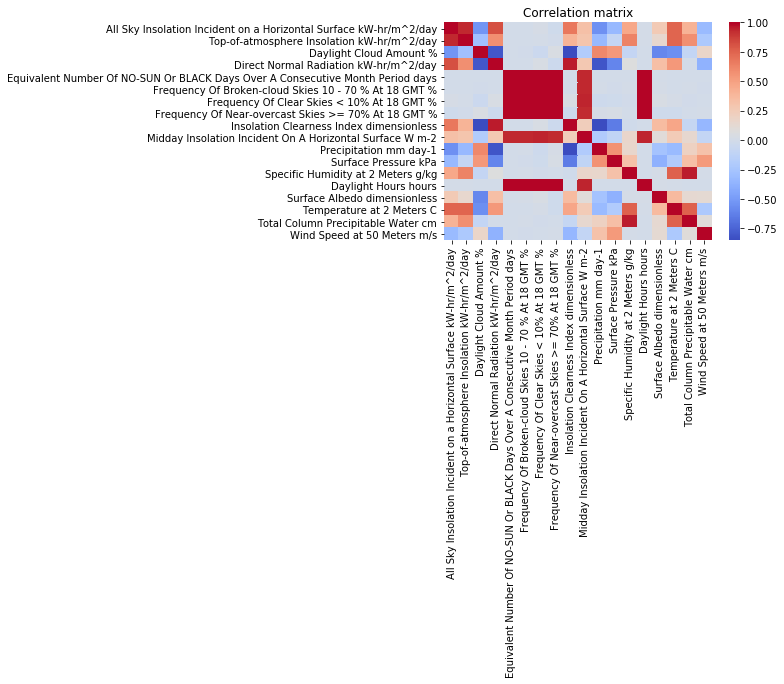

In [9]:
sns.heatmap(main_df[main_df.columns[2:]].corr() ,cmap='coolwarm')
#main_df[main_df.columns[2:]].corr()
plt.title('Correlation matrix')

Text(0.5, 1, 'Correlation matrix')

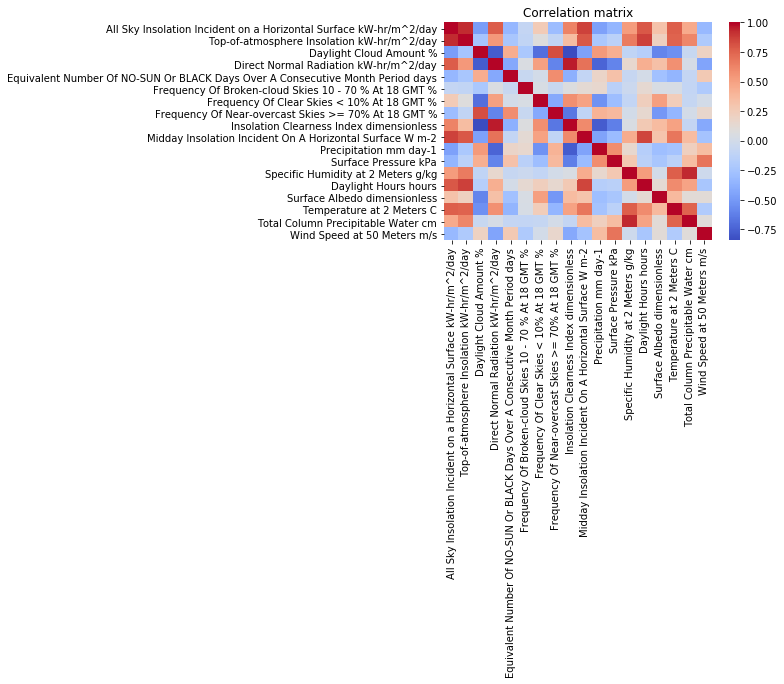

In [11]:
sns.heatmap(main_df[main_df.columns[2:]].corr(method='spearman') ,cmap='coolwarm')
plt.title('Correlation matrix')

Text(0.5, 1, 'Correlation matrix, KENDALL')

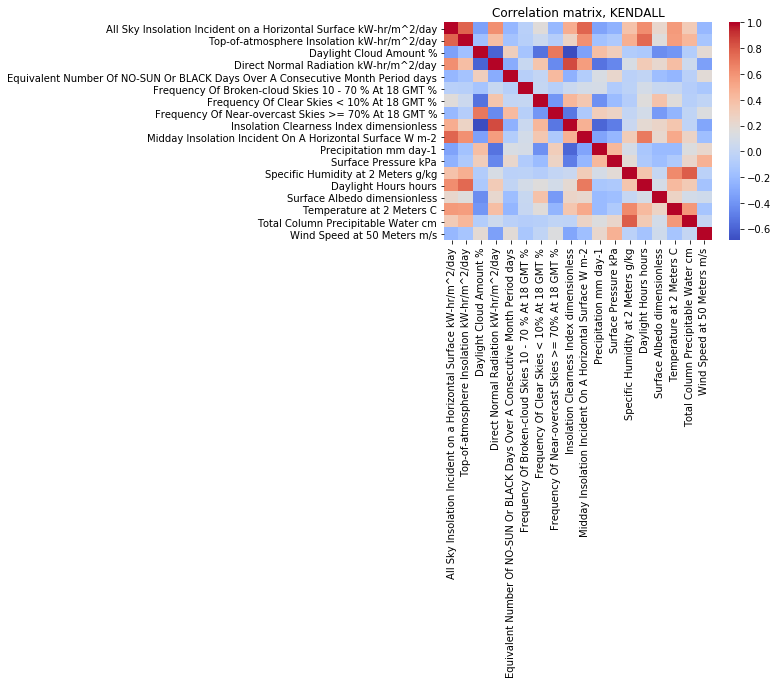

In [10]:
sns.heatmap(main_df[main_df.columns[2:]].corr(method='kendall') ,cmap='coolwarm')
plt.title('Correlation matrix, KENDALL')

In [65]:

#pd.plotting.scatter_matrix(main_df[main_df.columns[2:]], alpha=0.2);

#pd.plotting.scatter_matrix(data.iloc[: , 0:10]);

#main_df.[[['All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day'],['Frequency Of Broken-cloud Skies 10 - 70 % At 18 GMT %'],\
 #            ['Frequency Of Near-overcast Skies >= 70% At 18 GMT %'],['Precipitation mm day-1'],\
  #          ['Specific Humidity at 2 Meters g/kg'], ['Temperature at 2 Meters C'],\
   #          ['Wind Speed at 50 Meters m/s']]]#,[par]]

    
main_df.iloc[:,[2, 4, 7, 9, 12, 13,14, 17,19]]
    
#df1.iloc[1:5,2:4]

#Frequency Of Near-overcast Skies >= 70% At 18 GMT %
#Precipitation mm day-1
#Specific Humidity at 2 Meters g/kg
#Temperature at 2 Meters C
#Wind Speed at 50 Meters m/s

,All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day,Daylight Cloud Amount %,Frequency Of Broken-cloud Skies 10 - 70 % At 18 GMT %,Frequency Of Near-overcast Skies >= 70% At 18 GMT %,Precipitation mm day-1,Surface Pressure kPa,Specific Humidity at 2 Meters g/kg,Temperature at 2 Meters C,Wind Speed at 50 Meters m/s
0,1.97,66.6,25.07,64.96,2.79,101.27,3.25,-0.64,7.05
1,3.26,51.9,14.52,54.40,3.23,101.27,7.45,13.21,6.04
2,2.14,61.4,19.09,60.91,3.10,101.36,5.43,7.49,6.67
3,1.73,62.8,23.90,59.53,3.16,101.30,3.89,2.25,6.95
4,3.98,60.9,-999.00,-999.00,3.25,101.16,7.48,11.19,6.07
...,...,...,...,...,...,...,...,...,...
151,5.29,66.0,7.77,72.43,3.40,99.08,7.96,13.80,6.92
152,5.91,60.9,13.33,65.76,3.31,99.06,11.00,19.38,5.95
153,5.99,52.7,23.75,54.84,3.18,99.16,12.93,22.65,5.44
154,5.15,51.4,22.43,56.74,3.40,99.26,12.35,22.11,5.31


In [66]:
main_df.iloc[:,[2, 4, 7, 9, 12, 13,14, 17,19]].corr()

,All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day,Daylight Cloud Amount %,Frequency Of Broken-cloud Skies 10 - 70 % At 18 GMT %,Frequency Of Near-overcast Skies >= 70% At 18 GMT %,Precipitation mm day-1,Surface Pressure kPa,Specific Humidity at 2 Meters g/kg,Temperature at 2 Meters C,Wind Speed at 50 Meters m/s
All Sky Insolation Incident on a Horizontal Surface kW-hr/m^2/day,1.000000,-0.543231,-0.001087,-0.018280,-0.437767,-0.292162,0.481047,0.750519,-0.375235
Daylight Cloud Amount %,-0.543231,1.000000,-0.004778,0.043207,0.532889,0.467408,-0.157356,-0.587219,0.283286
Frequency Of Broken-cloud Skies 10 - 70 % At 18 GMT %,-0.001087,-0.004778,1.000000,0.998221,0.006260,-0.001658,0.007843,0.004297,-0.006655
Frequency Of Near-overcast Skies >= 70% At 18 GMT %,-0.018280,0.043207,0.998221,1.000000,0.021381,0.021842,-0.001584,-0.020251,0.011730
Precipitation mm day-1,-0.437767,0.532889,0.006260,0.021381,1.000000,0.574872,0.289611,-0.159073,0.264554
Surface Pressure kPa,-0.292162,0.467408,-0.001658,0.021842,0.574872,1.000000,0.387054,-0.091207,0.472007
Specific Humidity at 2 Meters g/kg,0.481047,-0.157356,0.007843,-0.001584,0.289611,0.387054,1.000000,0.794861,-0.087943
Temperature at 2 Meters C,0.750519,-0.587219,0.004297,-0.020251,-0.159073,-0.091207,0.794861,1.000000,-0.319683
Wind Speed at 50 Meters m/s,-0.375235,0.283286,-0.006655,0.011730,0.264554,0.472007,-0.087943,-0.319683,1.000000


Text(0.5, 1, 'Correlation matrix-Pearson')

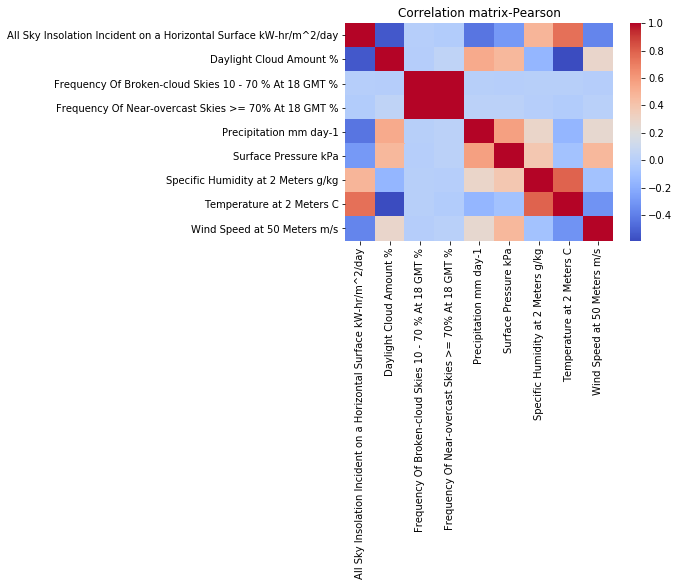

In [68]:
sns.heatmap(main_df.iloc[:,[2, 4, 7, 9, 12, 13,14, 17,19]].corr() ,cmap='coolwarm')
#main_df[main_df.columns[2:]].corr()
plt.title('Correlation matrix-Pearson')

Text(0.5, 1, 'Correlation matrix-Spearman')

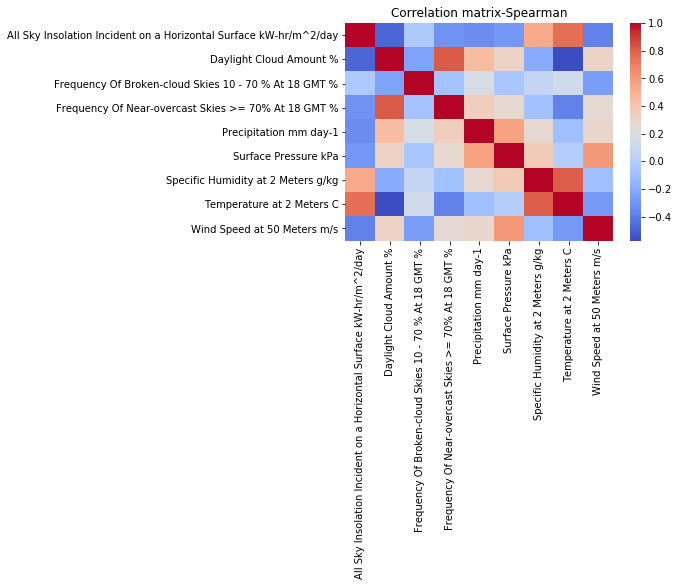

In [69]:
sns.heatmap(main_df.iloc[:,[2, 4, 7, 9, 12, 13,14, 17,19]].corr(method='spearman') ,cmap='coolwarm')
plt.title('Correlation matrix-Spearman')

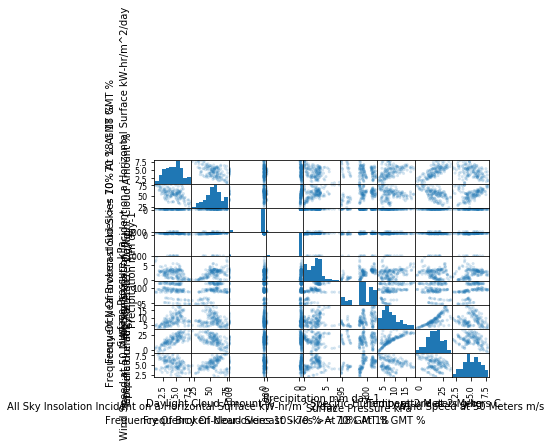

In [70]:
pd.plotting.scatter_matrix(main_df.iloc[:,[2, 4, 7, 9, 12, 13,14, 17,19]], alpha=0.2);


In [87]:
5+6

11